#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

#Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits_vegetable_dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits_vegetable_dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

#Building Convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25)) #dropout is basically used to prevent the overfitting.

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))# to avoid overfitting.

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling And Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 634s 6s/step - accuracy: 0.0364 - loss: 33.3590 - val_accuracy: 0.0541 - val_loss: 3.5704
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 119s 700ms/step - accuracy: 0.0263 - loss: 3.5791 - val_accuracy: 0.0769 - val_loss: 3.5325
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 690ms/step - accuracy: 0.0336 - loss: 3.5670 - val_accuracy: 0.0855 - val_loss: 3.4833
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 698ms/step - accuracy: 0.0505 - loss: 3.5650 - val_accuracy: 0.0883 - val_loss: 3.5056
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 687ms/step - accuracy: 0.0470 - loss: 3.5129 - val_accuracy: 0.1083 - val_loss: 3.4382
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 706ms/step - accuracy: 0.0730 - loss: 3.4655 - val_accuracy: 0.1311 - val_loss: 3.3280
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 706ms/step - accuracy: 0.0725 - loss: 3.4496 - val_accuracy: 0.1510 - val_loss: 3.3310
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 695ms/step - accuracy: 0.0889 - loss: 3.3924 - val_accu

#Evaluating The Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 603ms/step - accuracy: 0.9654 - loss: 0.1859
Training accuracy: 0.965008020401001


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 597ms/step - accuracy: 0.9597 - loss: 0.2466
Validation accuracy: 0.945868968963623


#Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03627608343958855,
  0.033707864582538605,
  0.03531300276517868,
  0.04269662871956825,
  0.05296950414776802,
  0.08250401169061661,
  0.08089887350797653,
  0.09534510225057602,
  0.1306581050157547,
  0.12937399744987488,
  0.15601925551891327,
  0.1817014515399933,
  0.19871589541435242,
  0.22439807653427124,
  0.272873193025589,
  0.2857142984867096,
  0.33354735374450684,
  0.36565008759498596,
  0.40513643622398376,
  0.4407704770565033,
  0.4709470272064209,
  0.5284109115600586,
  0.574638843536377,
  0.5672551989555359,
  0.6263242363929749,
  0.6696628928184509,
  0.6963081955909729,
  0.7280898690223694,
  0.7659711241722107,
  0.7919743061065674,
  0.8134831190109253,
  0.8269662857055664],
 'loss': [11.029397010803223,
  3.576524019241333,
  3.564607620239258,
  3.556931495666504,
  3.5028092861175537,
  3.44803786277771,
  3.420992374420166,
  3.374083995819092,
  3.277618408203125,
  3.221771001815796,
  3.1782500743865967,
  3.0834407806396484,
  2.98

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.5868968963623 %


#Accuracy Visualization

#Training Visualization

In [ ]:
#training_history.history['accuracy']

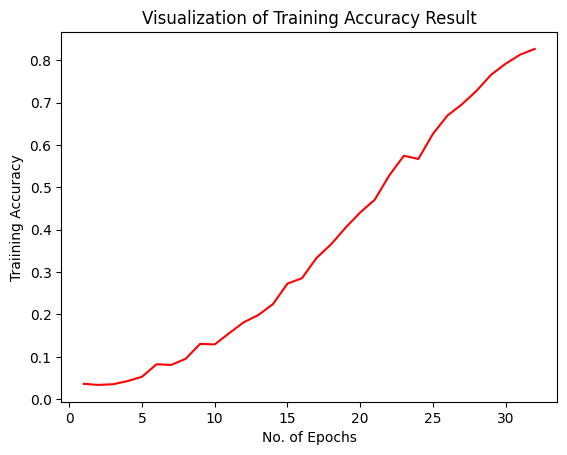

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

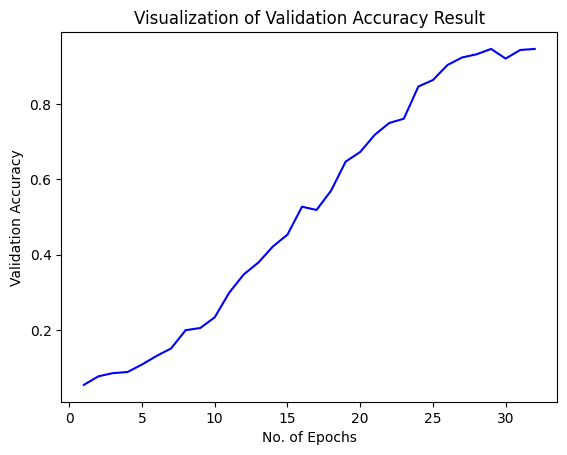

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()